In [9]:
# workflow adated from : https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python
# applied on 2019 dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2019.csv


In [10]:
wh = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

In [11]:
wh.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [12]:
print("Dimension of dataset: ")
wh.dtypes

Dimension of dataset: 


Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [16]:
wh1 = wh.drop('Country or region', axis=1)
wh1 = wh1.drop('Overall rank', axis=1)

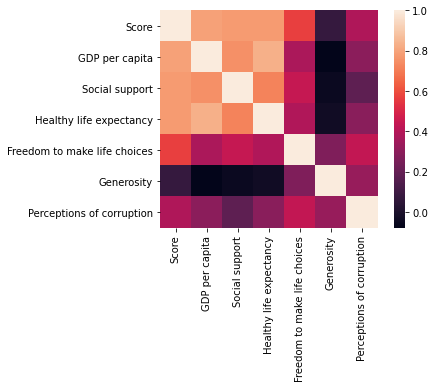

In [17]:
import seaborn as sns
cor = wh1.corr()
sns.heatmap(cor, square=True)

In [22]:
# plotting the score on a map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type = 'choropleth',
            locations = wh['Country or region'],
            locationmode = 'country names',
            z = wh['Score'],
            text = wh['Country or region'],
            colorbar = {'title': 'Happiness'})

layout = dict(title = 'Happiness Index 2019',
              geo = dict(showframe = False,
                         projection = {'type': 'mercator'}))

choromap3 = go.Figure(data=[data],layout=layout)
iplot(choromap3)


In [23]:
# clustering of countries

# scaling wh1
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 2.12871112,  1.09504166,  1.26809758, ...,  1.4242823 ,
        -0.33540398,  2.99675712],
       [ 1.97639663,  1.20332385,  1.22115409, ...,  1.39627687,
         0.70726491,  3.17715844],
       [ 1.93493825,  1.46773387,  1.25133205, ...,  1.47329179,
         0.90737308,  2.4449413 ],
       ...,
       [-1.98648391, -1.39796708, -2.31972634, ..., -2.74852598,
        -0.28274393, -0.90840093],
       [-2.09463621, -2.21386084, -4.05328238, ..., -1.17322084,
         0.52822076, -0.8022825 ],
       [-2.30192812, -1.50876747, -2.12524617, ..., -2.67851242,
         0.18066446, -0.20801932]])

In [25]:
# implementing K means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(2)
kmeans.fit(wh1)
cluster_labels = kmeans.predict(wh1)
centers = kmeans.cluster_centers_

kmeans_labels = pd.DataFrame(cluster_labels)
wh1.insert((wh1.shape[1]), 'kmeans_labels', kmeans_labels)

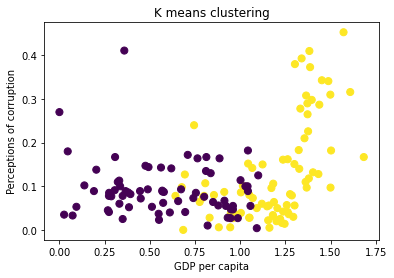

In [27]:
# plotting the kmeans clusters
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(wh1['GDP per capita'], wh1['Perceptions of corruption'], c=kmeans_labels[0], s=50)
plt.title('K means clustering')
plt.xlabel('GDP per capita')
plt.ylabel('Perceptions of corruption')
plt.show()

In [29]:
# using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering as ac
agg_clust = ac(n_clusters=2, affinity ='euclidean', linkage='ward')
agg_clust_labels = agg_clust.fit_predict(wh1)

agglomerative = pd.DataFrame(agg_clust_labels)
wh1.insert((wh1.shape[1]), 'agglomerative', agglomerative)

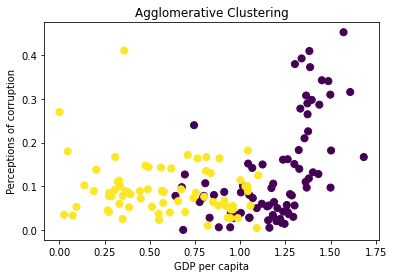

In [35]:
# plotting agglomerative

gdp = 'GDP per capita'
corruption = 'Perceptions of corruption'

plt.scatter(wh1['GDP per capita'], wh1['Perceptions of corruption'], c=agglomerative[0], s=50)

plt.title('Agglomerative Clustering')
plt.xlabel(gdp)
plt.ylabel(corruption)
plt.show()

In [31]:
# AFfinity Propagation

from sklearn.cluster import AffinityPropagation

aff_prop = AffinityPropagation(damping=0.5, max_iter = 250, affinity='euclidean')
aff_prop.fit(wh1)
aff_prop_labels  = aff_prop.predict(wh1)
aff_prop_centers = aff_prop.cluster_centers_

affinity = pd.DataFrame(aff_prop_labels)
wh1.insert((wh1.shape[1]), 'affinity', affinity)

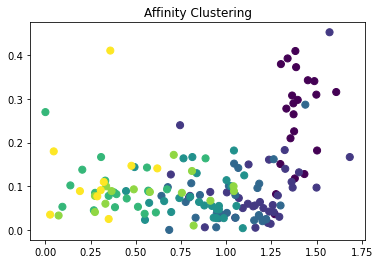

In [36]:
plt.scatter(wh1[gdp], wh1[corruption], c=affinity[0], s=50)
plt.title('Affinity Clustering')
plt.show()

# we see diffused labels

In [40]:
# using gaussian mixture
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2)
model.fit(wh1)

gaussian_labels = model.predict(wh1)

gmm = pd.DataFrame(gaussian_labels)
wh1.insert((wh1.shape[1]), 'gmm', gmm)

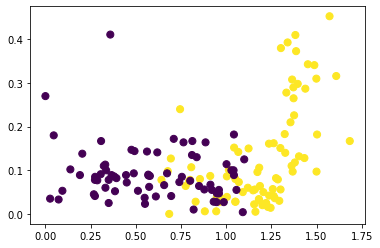

In [43]:
plt.scatter(wh1[gdp], wh1[corruption], c=gmm[0], s=50)
plt.title('Gaussian mixture')
plt.show()